#Discriminant **Analysis**

Logistic regression is a classification algorithm traditionally limited to only two-class classification problems (i.e. default = Yes or No). However, if we have more than two classes then *Linear and Discriminant Analysis* (LDA & QDA) is an often-preferred classification technique.

`Discriminant analysis models the distribution of the predictors X separately in each of the response classes (i.e. default = “Yes”, default = “No” ), and then uses Bayes’ theorem to flip these around into estimates for the probability of the response category given the value of X`

*`In this Project, we will apply discriminant analysis to recognize the digits in the MNIST data set`*

LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution and the covariance of the predictor variables are common across all k levels of the response variable Y. Quadratic discriminant analysis (QDA) provides an alternative approach.

Proceeding, we will apply **QDA** to train and validate the dataset and publish accuracy of the model.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import math
from scipy.stats import multivariate_normal

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets("data/MNIST/",one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [32]:
X_train= data.train.images
Y_train = np.asarray(data.train.labels, dtype=np.int32)
X_test = data.test.images 
Y_test = np.asarray(data.test.labels, dtype=np.int32)
X_train.shape

(55000, 784)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 784)

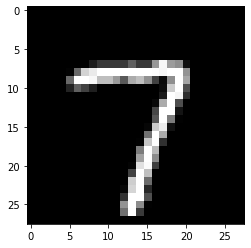

In [34]:
plt.imshow(X_train[100],cmap='gray')
plt.show()


**Quadratic Discriminant Analysis**
QDA is not really that much different from LDA except that you assume that the covariance matrix can be different for each class and so, we will estimate the covariance matrix 
Σ
k
 separately for each class k, k =1, 2, ... , K.

This is used for
*Modeling and classifying the categorical response 
Y
 with a non-linear combination of predictor variables 
X*


###Part-1: Calculating Mean and Standard Deviation

Calculating mean for Individual MNIST digits



```
Mean is denoted as μ
Mean of individual digits is calculated using numpy and saved in a list
```




In [0]:
X_list = []
for i in range(10):
  t = X_train[Y_train[:,i]==1]
  X_list.append(t)

#Mean
M_list = []
for i in range(10):
  m = np.mean(X_list[i],axis=0) 
  M_list.append(m)

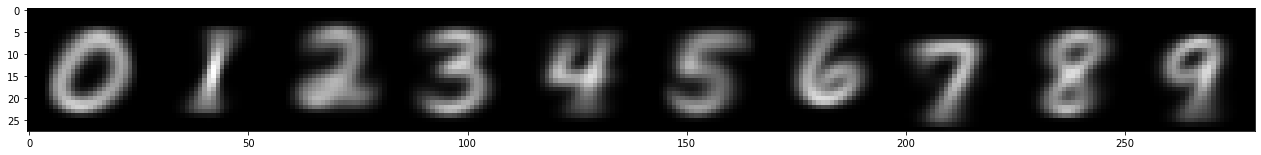

In [36]:
#Images of mean of all digits
mean_image = np.concatenate((M_list[0],M_list[1],M_list[2],M_list[3],M_list[4],
                            M_list[5],M_list[6],M_list[7],M_list[8],M_list[9]),axis=1)
plt.figure(figsize = (22,22))
plt.imshow(mean_image,cmap='gray');
plt.show()




Calculating Standard Deviation for Individual MNIST digits






In [0]:
#Standard Deviation
S_list = []
for i in range(10):
  s = np.std(X_list[i],axis=0) 
  S_list.append(s)

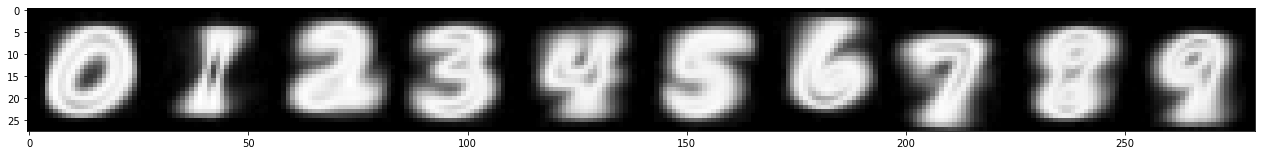

In [38]:
#Images of SD of all digits
sd_image = np.concatenate((S_list[0],S_list[1],S_list[2],S_list[3],S_list[4],
                            S_list[5],S_list[6],S_list[7],S_list[8],S_list[9]),axis=1)
plt.figure(figsize = (22,22))
plt.imshow(sd_image,cmap='gray');
plt.show()

###Part-2

**The Quadratic discriminant Functions are:**

$gi(x)=x_tW_ix+N^t_ix+B_i0 $

where,

$W_i = (-1/2) ∑_i^-1 $

$N_i = ∑_i^-1 μ_i $

$B_i0=−12μ^t_i∑^−1_i μ_i+ ln P(ωi)− (1/2)ln|∑_i|$

`P(ωi) is calculated below:
All Prior probabilities values leads to 1`

In [0]:
#Calculating Prior Probabilities
priors = []
for i in range(len(X_list)):
  var = X_list[i].size/X_train.size
  priors.append(var)

priors = np.asarray(priors)

$∑_i$ is calculated below: 

```
Numpy covariance is used to get the covariance of each individual digit with respect to the dataset
```



In [0]:
from numpy.linalg import pinv
from numpy.linalg import det

C0 = np.reshape(X_list[0], (5444, 784))
c0 = np.cov(C0.T)

C1 = np.reshape(X_list[1], (6179, 784))
c1 = np.cov(C1.T)

C2 = np.reshape(X_list[2], (5470, 784))
c2 = np.cov(C2.T)

C3 = np.reshape(X_list[3], (5638, 784))
c3 = np.cov(C3.T)

C4 = np.reshape(X_list[4], (5307, 784))
c4 = np.cov(C4.T)

C5 = np.reshape(X_list[5], (4987, 784))
c5 = np.cov(C5.T)

C6 = np.reshape(X_list[6], (5417, 784))
c6 = np.cov(C6.T)

C7 = np.reshape(X_list[7], (5715, 784))
c7 = np.cov(C7.T)

C8 = np.reshape(X_list[8], (5389, 784))
c8 = np.cov(C8.T)

C9 = np.reshape(X_list[9], (5454, 784))
c9 = np.cov(C9.T)

In [0]:
#Co-variance array with each individual matrices
covar_array = np.array((c0,c1,c2,c3,c4,c5,c6,c7,c8,c9))

C_inv = []
for i in range(len(covar_array)):
  cinv = pinv(covar_array[i])
  C_inv.append(cinv)

c_n = np.asarray(C_inv)

$W_i = -1/2 ∑_i^-1 $ 

In [0]:
#Calculating W
W = []
for i in range(len(C_inv)):
  w = -0.5 * C_inv[i]
  W.append(w)

W = np.asarray(W)

$N_i = ∑_i^-1 μ_i $


In [43]:
#calculating N
m_i = []
for i in range(len(M_list)):
  m = np.reshape(M_list[i], (784))
  m_i.append(m)

N = []
m_i = np.asarray(m_i)
for i in range(len(m_i)):
  n = np.matmul(c_n[i], m_i[i])
  N.append(n)

N = np.asarray(N)
len(N)

10

$B_i0=−12μ^t_i∑^−1_i μ_i+ ln P(ωi)− (1/2)ln|∑_i|$

In [44]:
#Calculating Bayes

B = []
for i in range(10):
  b1 = -0.5 * np.matmul(np.matmul(m_i[i].T,c_n[i] ),m_i[i]) 
  b2 = np.log(priors[i])
  b3 = 0.5 * np.log(det(covar_array[i])+0.001)
  b = b1 +  b2 - b3
  B.append(b)

B = np.asarray(B)
X_test.shape

(10000, 784)

$gi(x)=x_tW_ix+N^t_ix+B_i0 $
`Individual elements of G is obtained below:`

In [0]:
G_max = []
for i in range(len(X_test)):
  for j in range(len(W)):
    G = []
    g1 = np.matmul(np.matmul(X_test[i].T,W[j]),X_test[i])
    g2 = np.matmul(N[j].T,X_test[i])
    g3 = B[j]
    g = g1+g2+g3
    G.append(g)
  g_max = np.argmax(G)
  G_max.append(g_max)

**Calculating Error:**
`Error rate is calculated by comparing with the labeled dataset with the obtained G_max array which contains the predicted values
`

In [46]:
#Calculating the errors    
Y_array=np.asarray(G_max)
count=0
for i in range(len(Y_test)):
    if(Y_test[i][0]!=Y_array[i]):
        count=count+1
total = Y_test.shape[0]
print("Error rate: %d/%d = %f" % ((count,total,(count/float(total)))))

Error rate: 980/10000 = 0.098000


**Calculating Accuracy**:
`Accuracy is calculated by negating the total count by the error count and dividing by the total count`

In [47]:
print("The accuracy rate: %f percent " % (((total-count)/float(total))*100))

The accuracy rate: 90.200000 percent 



This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression.

**Why it doesn't perform as good as many other methods on LeCuns web page?**

The following reasons tries to explain why the method implemented by us doesn’t perform as well as other methods on LeCuns web page.

QDA assumes that the data are Gaussian. More specifically, it assumes that all classes share the different covariance matrix.

QDA finds quadratic decision boundaries in a K−1 dimensional subspace. As such, it is not suited if there are higher-order interactions between the independent variables.

QDA is well-suited for multi-class problems but should be used with care when the class distribution is imbalanced because the priors are estimated from the observed counts. Thus, observations will rarely be classified to infrequent classes.

For any possible value of a feature, you need to estimate a likelihood value by a frequentist approach. This can result in probabilities going towards 0 or 1, which in turn leads to numerical instabilities and worse results. In this case, you need to smooth in some way your probabilities, or to impose some prior on your data. This shortcoming is absent in methods involving ANNs and Neural Networks.

